# Extract Job Posts from Indeed

# Create a table in database

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# Read the database connection info from the config.ini

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

# Establish a connection to the databas, and create a cursor.

In [3]:
conn = psycopg2.connect(host = host,
                       user = user,
                        password = pwd,
                        dbname = db
                       )
cur = conn.cursor()

# Design the table in SQL

In [4]:
table_sql = """
            CREATE TABLE IF NOT EXISTS gp23.indeed
            (
                id SERIAL,
                job_title VARCHAR(200),
                job_company VARCHAR(200),
                job_loc VARCHAR(200),
                job_salary VARCHAR(200),
                job_summary TEXT,
                PRIMARY KEY(id)
            );

            """

# create the table

In [5]:
cur.execute(table_sql)
conn.commit()

# Request HTML

In [6]:
url = 'https://www.indeed.com/jobs?q=intelligence+analyst&start=1'

In [7]:
import urllib.request
response = urllib.request.urlopen(url)
html_data= response.read()

# Parese HTML

In [8]:
!pip install beautifulsoup4

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [9]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data,'html.parser')

In [10]:
for table_resultsBody in soup.find_all('table', id = 'resultsBody'):
    pass

In [11]:
for table_pageContent in table_resultsBody.find_all('table', id = 'pageContent'):
    pass

In [12]:
for td_resultsCol in table_pageContent.find_all('td', id = 'resultsCol'):
    pass

# Save Data to Database

In [13]:
#  identify the job title, company, ratings, reviews, salary, and summary
for div_row in td_resultsCol.find_all('div', class_='jobsearch-SerpJobCard unifiedRow row result'):

    # find job title
    job_title = None
    job_company  = None
    job_rating = None
    job_loc = None
    job_salary = None
    job_summary = None
    for h2_title in div_row.find_all('h2', class_ = 'title'):
       
        job_title = h2_title.a.text.strip().replace("'","_")
   
    for div_dsc in div_row.find_all('div', class_ = 'sjcl'):
        
        #find company name
        for span_company in div_dsc.find_all('span', class_ = 'company'):
            job_company = span_company.text.strip().replace("'","_")
        
        # find location
        for div_loc in div_dsc.find_all('div', class_ = 'location accessible-contrast-color-location'):
            job_loc = div_loc.text.strip().replace("'","_")
    
    # find salary
    for div_salary in div_row.find_all('div',class_ ='salarySnippet'):
        job_salary = div_salary.text.strip().replace("'","_")
    
    #find summary
    for div_summary in div_row.find_all('div', class_ = 'summary'):
        job_summary = div_summary.text.strip().replace("'","_")
        
    # insert into database
    
    sql_insert = """
                insert into gp23.indeed(job_title,job_company,job_loc,job_salary,job_summary)
                values('{}','{}','{}','{}','{}')            
                """.format(job_title,job_company,job_loc,job_salary,job_summary)

    cur.execute(sql_insert)
    conn.commit()

# View the Table

In [14]:
df = pandas.read_sql_query('select * from gp23.indeed', conn)
df[:]

,id,job_title,job_company,job_loc,job_salary,job_summary
0,1,Intelligence Analyst/Principal Intelligence An...,Northrop Grumman,"Aurora, CO 80017 (Tollgate Overlook area)",None,Operations/Technical Signals Analysis with exp...
1,2,Senior Marketplace Intelligence Analyst,Constellation Brands,"Chicago, IL 60603 (Loop area)","$10,000 a year",Penetrate new stakeholders across B/W/S commer...
2,3,Principal Intelligence Analyst,Northrop Grumman,"McLean, VA 22102",None,Successful candidates in this position will co...
3,4,Signals Analyst - Signals Analysis Development...,National Security Agency,"Fort Meade, MD","$72,351 - $90,157 a year",A high school diploma or GED plus 7 years of r...
4,5,Intelligence Analyst Intern,Everbridge,None,None,Conduct research into existing risk intelligen...
5,6,INTELLIGENCE OPERATIONS SPECIALIST,US Department of Defense,None,"$101,585 - $132,064 a year",Substitution of education may not be used in l...
6,7,Virtual Intelligence Analyst,G4S,None,None,Experience learning and quickly becoming profi...
7,8,Undergraduate Internship/Co-op Program - Intel...,Central Intelligence Agency,None,$21.21 - $22.43 an hour,"Engineering, science students, or those in oth..."
8,9,Junior Intelligence Analyst,Valiant Integrated Services,None,None,"Use analytic tools to create charts, maps, tim..."
9,10,"Criminal Intelligence Analyst, Senior","City of Dallas, TX",None,"$41,490 - $60,086 a year","Bachelor_s degree in a criminal justice, foren..."


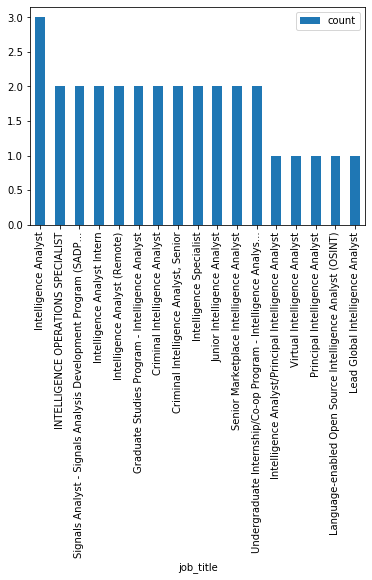

In [15]:
df = pandas.read_sql_query('select count(*) as count,job_title from gp23.indeed group by job_title order by count desc ', conn)
df.plot.bar(x='job_title')

In [16]:
cur.close()
conn.close()